In [28]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yaqoo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
apps_df=pd.read_csv('Play Store Data.csv')
reviews_df=pd.read_csv('User Reviews.csv')

In [24]:
apps_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#step1 : Handling missing values
#df.isnull() : finds the missing values
#df.dropna() : drops the rows and columns with  null values
#df.fillna : adds values into the missing rows and columns

In [ ]:
#df.duplicated(): identifies the duplicates
#df.drop_duplicates() : Removes duplicate rows

In [15]:
#step 2 : Data Cleaning
apps_df = apps_df.dropna(subset = ['Rating'])
for column in apps_df.columns:
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace = True)
apps_df=apps_df[apps_df['Rating']<=5]
reviews_df.dropna(subset=['Translated_Review'],inplace=True)

C:\Users\yaqoo\AppData\Local\Temp\ipykernel_6576\1279859574.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)


In [20]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
#converting the installs columns to numeric by removing the commas and plus
apps_df['Installs'] = apps_df['Installs'].str.replace(',','').str.replace('+','').astype(int)
#converitng price columns to numeric after removing $
apps_df['Price'] = apps_df['Price'].str.replace('$','').astype(float)

In [22]:
#merge datasets that is apps and reviews column sets
merged_df=pd.merge(apps_df,reviews_df,on='App',how='inner')

In [23]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [ ]:
#Data transformation : Converts data from one format to another making it suitable for ML models etc....
#Normalization - within a range
#Categorization - Categorizing the data

In [28]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))/1024
    else:
        return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)

In [29]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [34]:
#logarithmic
apps_df['Log_Installs'] = np.log(apps_df['Installs'])
#apps_df['Log_Reviews'] = np.log(apps_df['Reviews'])

In [37]:
apps_df['Reviews']=apps_df['Reviews'].astype(int)

In [38]:
apps_df['Log_Reviews'] = np.log(apps_df['Reviews'])

In [39]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Log_Installs      float64
Log_Reviews       float64
dtype: object

In [41]:
#Categorizing
#Two categories: ratings/reviews and revenue
def rating_group(rating):
    if rating<=4:
        return 'Toop rated app'
    elif rating>=3:
        return 'Above average'
    elif rating>=2:
        return 'Average'
    else:
        return 'Below Average'
apps_df['Rating_Group'] = apps_df['Rating'].apply(rating_group)

In [42]:
#Revenue column - revenue gain
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']

In [43]:
apps_df['Revenue']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Revenue, Length: 8892, dtype: float64

In [ ]:
#Sentimental Analysis - helps computer understand, generate and read human language. It helps computers to understand the structure of a sentence
#We use NLP in text classification like spam classification, reviews, or translation of languages etc....
#Positive negative compound

In [44]:
sia = SentimentIntensityAnalyzer()

In [45]:
#Polartiy scores in SIA
#Positive, Negative, Neutral and Compund -1 very negative +1 - very positive

In [47]:
review = "This app is amazing! I love the new features."
sentiment_scores = sia.polarity_scores(review)
print(sentiment_scores)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [48]:
review = "This app is very bad! I hate the new features."
sentiment_scores = sia.polarity_scores(review)
print(sentiment_scores)

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8427}


In [50]:
review = "This app is okay."
sentiment_scores = sia.polarity_scores(review)
print(sentiment_scores)

{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.2263}


In [52]:
reviews_df['Sentiment_Score']=reviews_df['Translated_Review'].apply(lambda x:sia.polarity_scores(str(x))['compound'])

In [53]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [54]:
apps_df['Last Updated']= pd.to_datetime(apps_df['Last Updated'], errors = 'coerce')

In [56]:
apps_df['Year']=apps_df['Last Updated'].dt.year

In [57]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Above average,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Toop rated app,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Above average,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Above average,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Above average,0.0,2018


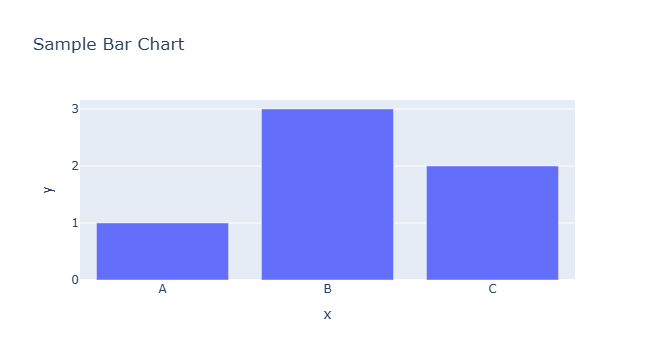

In [3]:
#plotly
fig = px.bar(x=['A','B','C'],y=[1,3,2],title='Sample Bar Chart')
fig.show()

In [4]:
#save in html
fig.write_html("Interactive_Plot.html")

In [5]:
#static visualizations: fixed images or plots
#interactive visualizations: interactive images  

In [7]:
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [16]:
def save_plot_as_html(fig, filename, insight):
    global plot_containers
    
    filepath = os.path.join(html_files_path, filename)
    
    # Convert figure to HTML snippet
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    
    # Append to the global container
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    
    # Save figure as standalone HTML
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [17]:
plot_width =400
plot_height = 300
plot_bh_color = 'black'
text_color = 'white'
text_font = {'size':16}
axis_font = {'size':12}

In [30]:
# Top 10 app categories in Play Store — FIGURE 1
category_counts = apps_df["Category"].value_counts().nlargest(10)

fig1 = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={"x": "Category", "y": "Count"},
    title="Top Categories on Play Store",
    color=category_counts.index,  # color by category
    color_discrete_sequence=px.colors.sequential.Plasma,  # valid list
    width=400,
    height=300
)

fig1.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size": 16},
    xaxis=dict(title_font={"size": 12}),
    yaxis=dict(title_font={"size": 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

# Correct marker line syntax for bars
fig1.update_traces(marker_line=dict(color="white", width=1))
# A global container string to hold all plots' HTML
plot_containers = ""
# Corrected function name + filename + closed string
save_plot_as_html(
    fig1,
    "category_graph1.html",
    "The top categories on the Play Store are dominated by Tools."
)


In [31]:
#paid vs free using pie charts

type_counts = apps_df["Type"].value_counts()

fig1 = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App type distribution',
    color_discrete_sequence=px.colors.sequential.Plasma,  # valid list
    width=400,
    height=300
)

fig1.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size": 16},
    margin=dict(l=10, r=10, t=30, b=10)
)

# Correct marker line syntax for bars
fig1.update_traces(marker_line=dict(color="white", width=1))
# A global container string to hold all plots' HTML
plot_containers = ""
# Corrected function name + filename + closed string
save_plot_as_html(
    fig1,
    "category_graph2.html",
    "Most Apps on the PLay Store are free, indicating a strategy to attract users first and monetize through ads or in app purchases."
)


In [35]:
#histogram rating distribution


fig3 = px.histogram(
    apps_df,
    x='Rating',
    nbins=20,
    title='Rating distribution',
    color_discrete_sequence=['#636EFA'],  # valid list
    width=400,
    height=300
)

fig3.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size": 16},
    xaxis=dict(title_font={"size": 12}),
    yaxis=dict(title_font={"size": 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

# Correct marker line syntax for bars
fig1.update_traces(marker_line=dict(color="white", width=1))
# A global container string to hold all plots' HTML
plot_containers = ""
# Corrected function name + filename + closed string
save_plot_as_html(
    fig3,
    "Rating Graph 3.html.","Ratings are skewed towards higher values, suggesting that most apps are rated favorably by users"  
)


In [44]:
sentiment_counts = reviews_df['Sentiment_Score'].value_counts()

fig4 = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x': 'Sentiment Score', 'y': 'Count'},
    title="Sentiment Distribution",
    color=sentiment_counts.index,  # color by category
    color_discrete_sequence=px.colors.sequential.RdPu,  # valid list
    width=400,
    height=300
)

fig4.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size": 16},
    xaxis=dict(title_font={"size": 12}),
    yaxis=dict(title_font={"size": 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
# Correct marker line syntax for bars
fig4.update_traces(marker_line=dict(color="white", width=1))
# A global container string to hold all plots' HTML
plot_containers = ""
# Corrected function name + filename + closed string
save_plot_as_html(
    fig4,
    "category_graph1.html",
    "The Sentiments in reviews show a mix of "
)

KeyError: 'Sentiment_Score'

In [44]:
sentiment_counts = reviews_df['Sentiment_Score'].value_counts()

fig4 = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x': 'Sentiment Score', 'y': 'Count'},
    title="Sentiment Distribution",
    color=sentiment_counts.index,  # color by category
    color_discrete_sequence=px.colors.sequential.RdPu,  # valid list
    width=400,
    height=300
)

fig4.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white",
    title_font={"size": 16},
    xaxis=dict(title_font={"size": 12}),
    yaxis=dict(title_font={"size": 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
# Correct marker line syntax for bars
fig4.update_traces(marker_line=dict(color="white", width=1))
# A global container string to hold all plots' HTML
plot_containers = ""
# Corrected function name + filename + closed string
save_plot_as_html(
    fig4,
    "category_graph1.html",
    "The Sentiments in reviews show a mix of "
)

KeyError: 'Sentiment_Score'

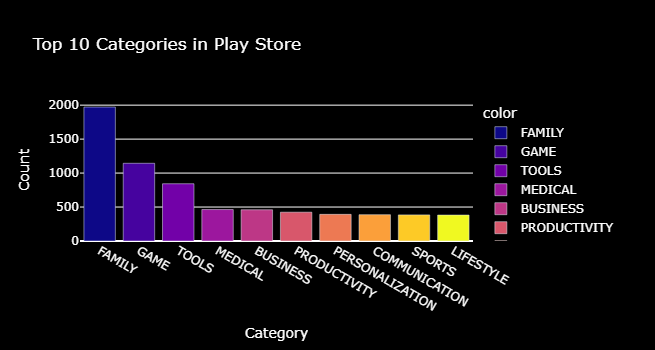

In [48]:
fig5 = px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={"x": "Category", "y": "Count"},
    title="Top 10 Categories in Play Store",
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=500,
    height=350
)

fig5.update_layout(
    plot_bgcolor="black",
    paper_bgcolor="black",
    font_color="white"
)

fig5.show()



# Correct marker line syntax for bars
fig5.update_traces(marker_line=dict(color="white", width=1))
# A global container string to hold all plots' HTML
plot_containers = ""
# Corrected function name + filename + closed string
save_plot_as_html(
    fig5,
    "Installs_graph5.html",
    "The categories with the most instALA "
)